# Heart Dataset Data Cleaning

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

In [2]:
# Importing the loan dataset
df = pd.read_csv("heart_2020_WOstream.csv")

# Configuring the display of pandas table
pd.set_option("display.max_colwidth", None)

In [3]:
# Display the top 5 records
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  31.19      No              No     No             0.0   
1           No  23.24      No              No     No             0.0   
2           No  32.92      No              No     No            10.0   
3           No  31.75     Yes              No     No             0.0   
4           No  19.74      No              No     No             0.0   

   MentalHealth DiffWalking     Sex AgeCategory   Race Diabetic  \
0           0.0          No    Male       40-44  White       No   
1           0.0          No  Female       65-69  White       No   
2           3.0          No  Female       45-49  White       No   
3           3.0          No    Male       45-49  White       No   
4           1.0          No  Female       55-59  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Excellent        8.0     No            No         No  
1              Yes  Very good        7.0     No           Yes        Yes  
2              Yes       Fair        8.0     No            No         No  
3              Yes       Fair        5.0     No            No         No  
4              Yes  Excellent        8.0     No            No         No

In [4]:
df_copy = df.copy()

In [5]:
print("There are a toal of",df.shape[0],"records and",df.shape[1],"columns.")

There are a toal of 319645 records and 18 columns.


In [6]:
print("Columns in the dataset:\n",list(df.columns))

Columns in the dataset:
 ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


<h3>Description of the dataset</h3>
    
- <b>HeartDisease</b>: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

- <b>BMI</b>: Body Mass Index (BMI)

- <b>Smoking</b>: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

- <b>AlcoholDrinking</b>: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

- <b>Stroke</b>: (Ever told) (you had) a stroke?

- <b>PhysicalHealth</b>: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

- <b>MentalHealth</b>: How many days during the past 30 days was your mental health not good? (0-30 days)

- <b>DiffWalking</b>: Do you have serious difficulty walking or climbing stairs?

- <b>Sex</b>: Are you male or female?

- <b>AgeCategory</b>: Fourteen-level age category

- <b>Race</b>: Imputed race/ethnicity value

- <b>Diabetic</b>: (Ever told) (you had) diabetes?

- <b>PhysicalActivity</b>: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

- <b>GenHealth</b>: Would you say that in general your health is...

- <b>SleepTime</b>: On average, how many hours of sleep do you get in a 24-hour period?

- <b>Asthma</b>: (Ever told) (you had) asthma?

- <b>KidneyDisease</b>: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

- <b>SkinCancer</b>: (Ever told) (you had) skin cancer?

In [7]:
print("Number of null values in each column:")
df.isna().sum()

Number of null values in each column:


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No null values in any of the columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319645 entries, 0 to 319644
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319645 non-null  object 
 1   BMI               319645 non-null  float64
 2   Smoking           319645 non-null  object 
 3   AlcoholDrinking   319645 non-null  object 
 4   Stroke            319645 non-null  object 
 5   PhysicalHealth    319645 non-null  float64
 6   MentalHealth      319645 non-null  float64
 7   DiffWalking       319645 non-null  object 
 8   Sex               319645 non-null  object 
 9   AgeCategory       319645 non-null  object 
 10  Race              319645 non-null  object 
 11  Diabetic          319645 non-null  object 
 12  PhysicalActivity  319645 non-null  object 
 13  GenHealth         319645 non-null  object 
 14  SleepTime         319645 non-null  float64
 15  Asthma            319645 non-null  object 
 16  KidneyDisease     31

In [9]:
continuous_features = df.select_dtypes(include='float64').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

In [10]:
print("Continuous Features:", continuous_features)
print("\nCategorical Features:", categorical_features)

Continuous Features: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

Categorical Features: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


## Duplicates

In [11]:
num_duplicated = len(df[df.duplicated()])
print("Number of duplicated records in the dataset:",num_duplicated)
print("Percentage of duplicated records in the dataset:",(num_duplicated/df.shape[0])*100)

Number of duplicated records in the dataset: 18071
Percentage of duplicated records in the dataset: 5.653459306418058


Since number of duplicates only contribute 5% of the dataset, I will remove it to reduce noise in the model development.

In [12]:
a_df = df.drop_duplicates()
print("Number of duplicates dropped:",df.shape[0] - a_df.shape[0])
print("Number of records after dropping duplicates:",a_df.shape[0])

Number of duplicates dropped: 18071
Number of records after dropping duplicates: 301574


## Outliers in Numerical columns

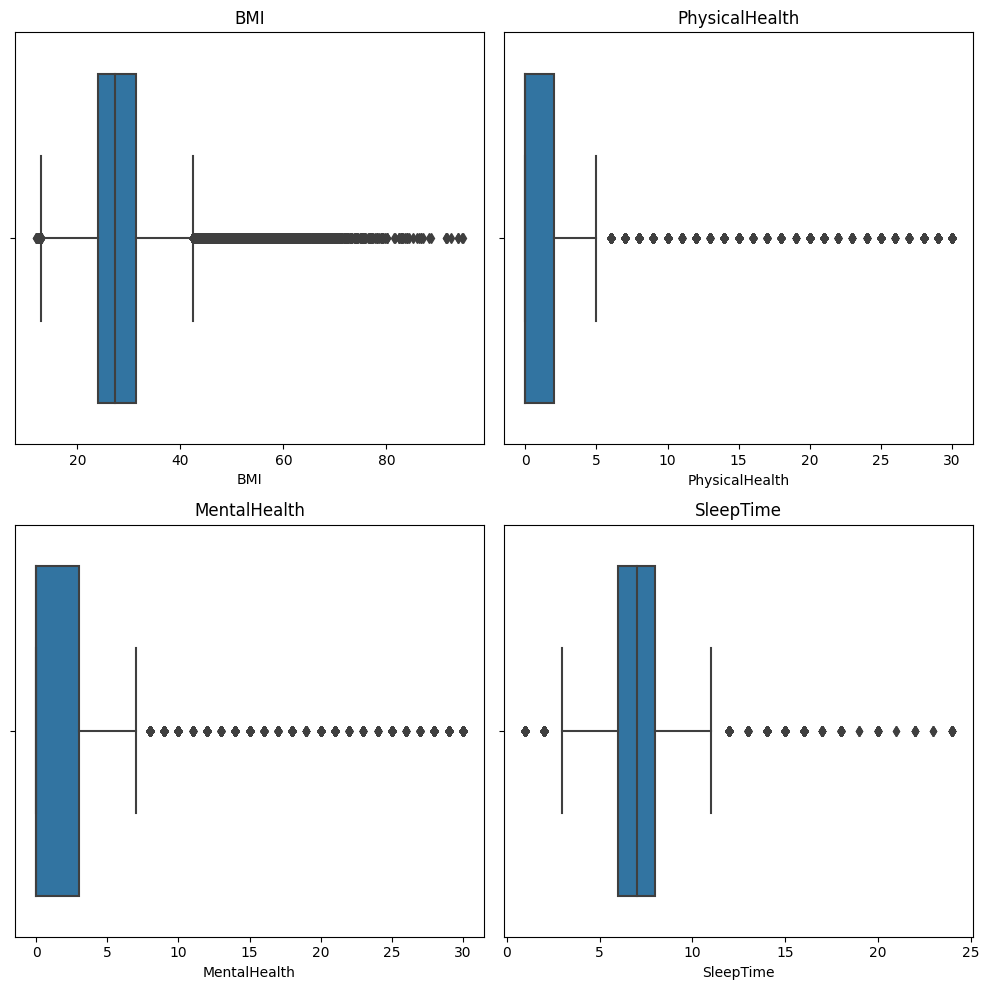

In [13]:
num_subplots = len(continuous_features)

# Create a grid of subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array to make it easier to iterate through the subplots
axes = axes.flatten()

# Plot each column as a separate boxplot in the corresponding subplot
for i, column in enumerate(continuous_features):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Remove any remaining empty subplots if the number of columns is less than 6
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # To improve the spacing between subplots
plt.show()

Apart from Meantal and PhysicalHealth column, I will remove outliers in BMI and SleepTime as they are not logical and are likely outliers which could affect model prediction performance.

In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr 
    df = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df

<Axes: xlabel='BMI'>

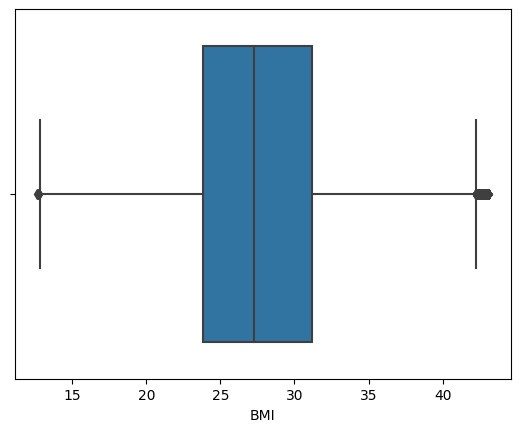

In [15]:
a_df = remove_outlier(a_df, "BMI")
sns.boxplot(x=a_df['BMI'])

<Axes: xlabel='SleepTime'>

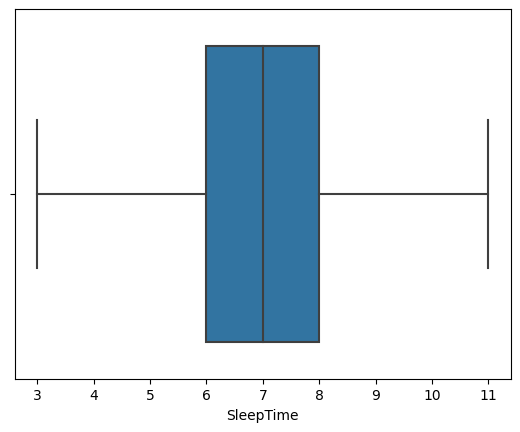

In [16]:
a_df = remove_outlier(a_df, "SleepTime")
sns.boxplot(x=a_df['SleepTime'])

## Replacing Values

In [17]:
categorical_columns = a_df.select_dtypes(include='object').columns.tolist()

In [18]:
for column in categorical_columns:
    print(column, a_df[column].unique(),'\n')

HeartDisease ['No' 'Yes'] 

Smoking ['No' 'Yes'] 

AlcoholDrinking ['No' 'Yes'] 

Stroke ['No' 'Yes'] 

DiffWalking ['No' 'Yes'] 

Sex ['Male' 'Female'] 

AgeCategory ['40-44' '65-69' '45-49' '55-59' '60-64' '80 or older' '75-79' '70-74'
 '35-39' '50-54' '30-34' '25-29' '18-24'] 

Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Hispanic'
 'Other'] 

Diabetic ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity ['Yes' 'No'] 

GenHealth ['Excellent' 'Very good' 'Fair' 'Poor' 'Good'] 

Asthma ['No' 'Yes'] 

KidneyDisease ['No' 'Yes'] 

SkinCancer ['No' 'Yes'] 



In [19]:
print("Percent of each value:\n",(a_df.Diabetic.value_counts()/a_df.shape[0])*100)

Percent of each value:
 No                         84.186890
Yes                        12.772834
No, borderline diabetes     2.198972
Yes (during pregnancy)      0.841304
Name: Diabetic, dtype: float64


### Replacing Diabetic Column

Yes during pregnancy means having diabetes so I convert it to 'yes'.
No, borderline diabetes means the individual does not have diabetes so 'no'.

In [20]:
# Replace diabetic values to be Yes/No only.
a_df['Diabetic'] = a_df['Diabetic'].replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'})

In [21]:
print("Percent of each value:\n",(a_df.Diabetic.value_counts()/a_df.shape[0])*100)

Percent of each value:
 No     86.385862
Yes    13.614138
Name: Diabetic, dtype: float64


### Replacing Yes/No to 0s and 1s.

Yes --> 1

No --> 0

In [22]:
columns_to_replace = [column for column in categorical_columns if 'Yes' in list(a_df[column].unique())]

In [23]:
for column in columns_to_replace:
    a_df[column] = a_df[column].replace({'Yes':1, 'No':0})

In [24]:
for column in categorical_columns:
    print(column, a_df[column].unique(),'\n')

HeartDisease [0 1] 

Smoking [0 1] 

AlcoholDrinking [0 1] 

Stroke [0 1] 

DiffWalking [0 1] 

Sex ['Male' 'Female'] 

AgeCategory ['40-44' '65-69' '45-49' '55-59' '60-64' '80 or older' '75-79' '70-74'
 '35-39' '50-54' '30-34' '25-29' '18-24'] 

Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Hispanic'
 'Other'] 

Diabetic [0 1] 

PhysicalActivity [1 0] 

GenHealth ['Excellent' 'Very good' 'Fair' 'Poor' 'Good'] 

Asthma [0 1] 

KidneyDisease [0 1] 

SkinCancer [0 1] 



In [25]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288362 entries, 0 to 319642
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      288362 non-null  int64  
 1   BMI               288362 non-null  float64
 2   Smoking           288362 non-null  int64  
 3   AlcoholDrinking   288362 non-null  int64  
 4   Stroke            288362 non-null  int64  
 5   PhysicalHealth    288362 non-null  float64
 6   MentalHealth      288362 non-null  float64
 7   DiffWalking       288362 non-null  int64  
 8   Sex               288362 non-null  object 
 9   AgeCategory       288362 non-null  object 
 10  Race              288362 non-null  object 
 11  Diabetic          288362 non-null  int64  
 12  PhysicalActivity  288362 non-null  int64  
 13  GenHealth         288362 non-null  object 
 14  SleepTime         288362 non-null  float64
 15  Asthma            288362 non-null  int64  
 16  KidneyDisease     28

In [26]:
columns_to_display = [column for column in categorical_columns if 0 in list(a_df[column].unique())]

In [27]:
columns_to_display

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

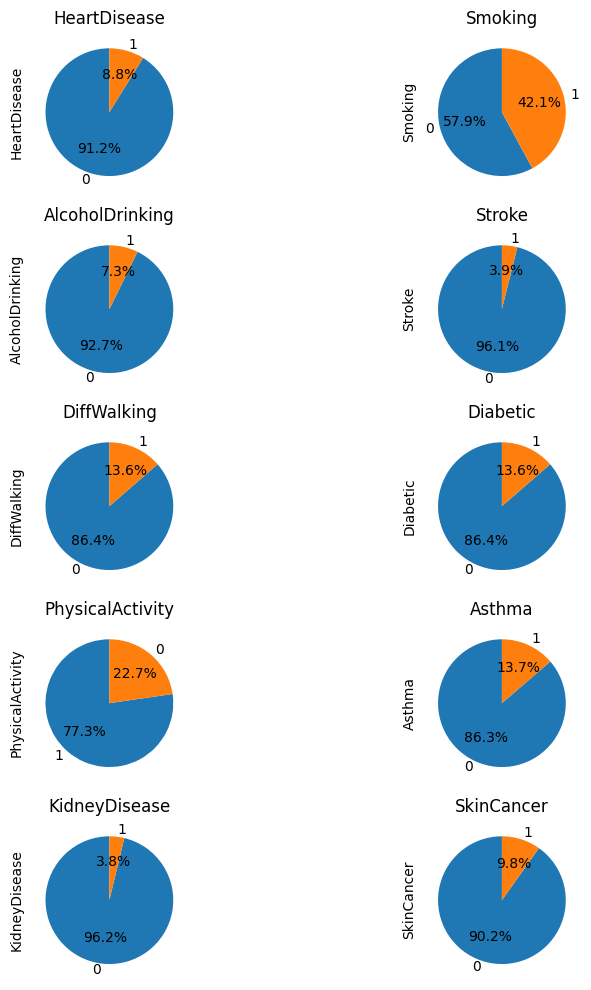

In [28]:
num_subplots = len(columns_to_display)

# Create a grid of subplots with appropriate number of rows and columns
num_rows = (num_subplots + 1) // 2  # Adjust the number of rows based on the number of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 10))

# Flatten the axes array to make it easier to iterate through the subplots
axes = axes.flatten()

# Plot pie charts for each column in the corresponding subplot
for i, column in enumerate(columns_to_display):
    a_df[column].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(column)

# Remove any remaining empty subplots
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # To improve the spacing between subplots
plt.show()

In [29]:
columns_to_display = [column for column in categorical_columns if 0 not in list(a_df[column].unique())]

C:\Users\fangg\AppData\Local\Temp\ipykernel_720\773816422.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)
C:\Users\fangg\AppData\Local\Temp\ipykernel_720\773816422.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)
C:\Users\fangg\AppData\Local\Temp\ipykernel_720\773816422.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)
C:\Users\fangg\AppData\Local\Temp\ipykernel_720\773816422.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)


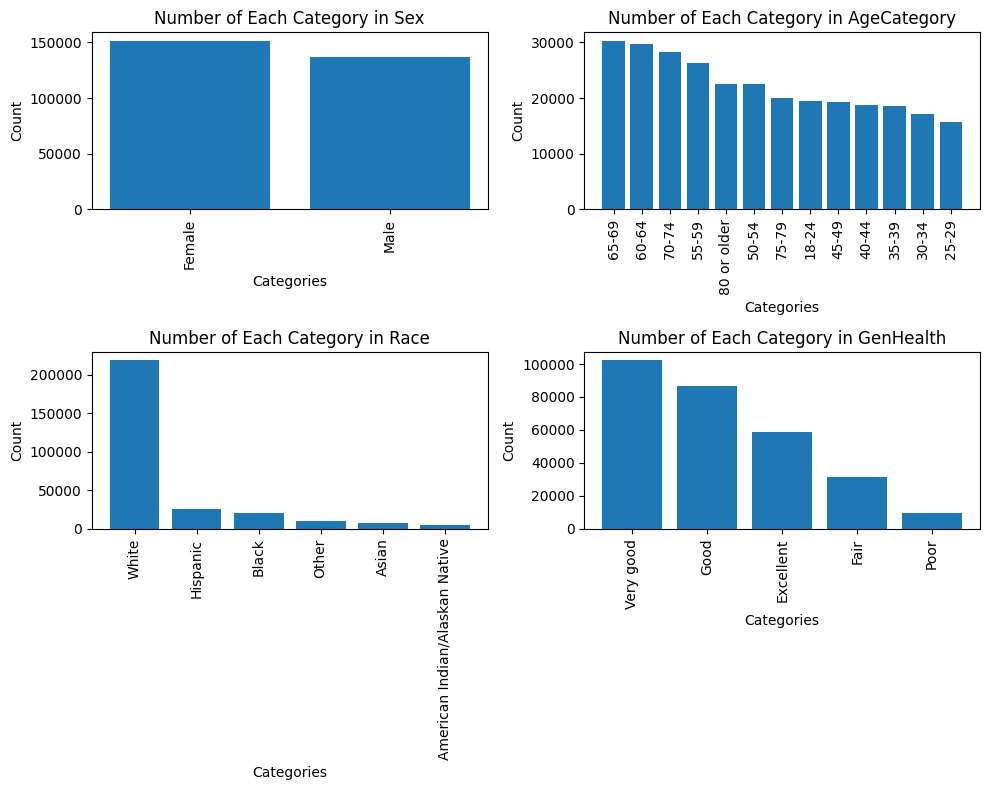

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

num_columns = len(columns_to_display)
num_rows = (num_columns + 1) // 2  # Add 1 to round up if there is an odd number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 8))

# Iterate through columns
for i, column in enumerate(columns_to_display):
    # Calculate the row and column indices for the current subplot
    row = i // 2
    col = i % 2

    # Count frequency of each category
    category_counts = a_df[column].value_counts()

    # Create bar plot for the current column in the appropriate subplot
    axes[row, col].bar(category_counts.index, category_counts.values)

    axes[row, col].set_xlabel('Categories')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Number of Each Category in {column}')
    axes[row, col].set_xticklabels(category_counts.index, rotation=90)

plt.tight_layout()
plt.show()

Looking at the occurrence of each demographic in the dataset, majority of the individuals are either of the White race, aged above 50, and/or have good general health statuses. This might result in the model being biased toward the white race.

Additionally, there is an equal distribution of male and female representation.

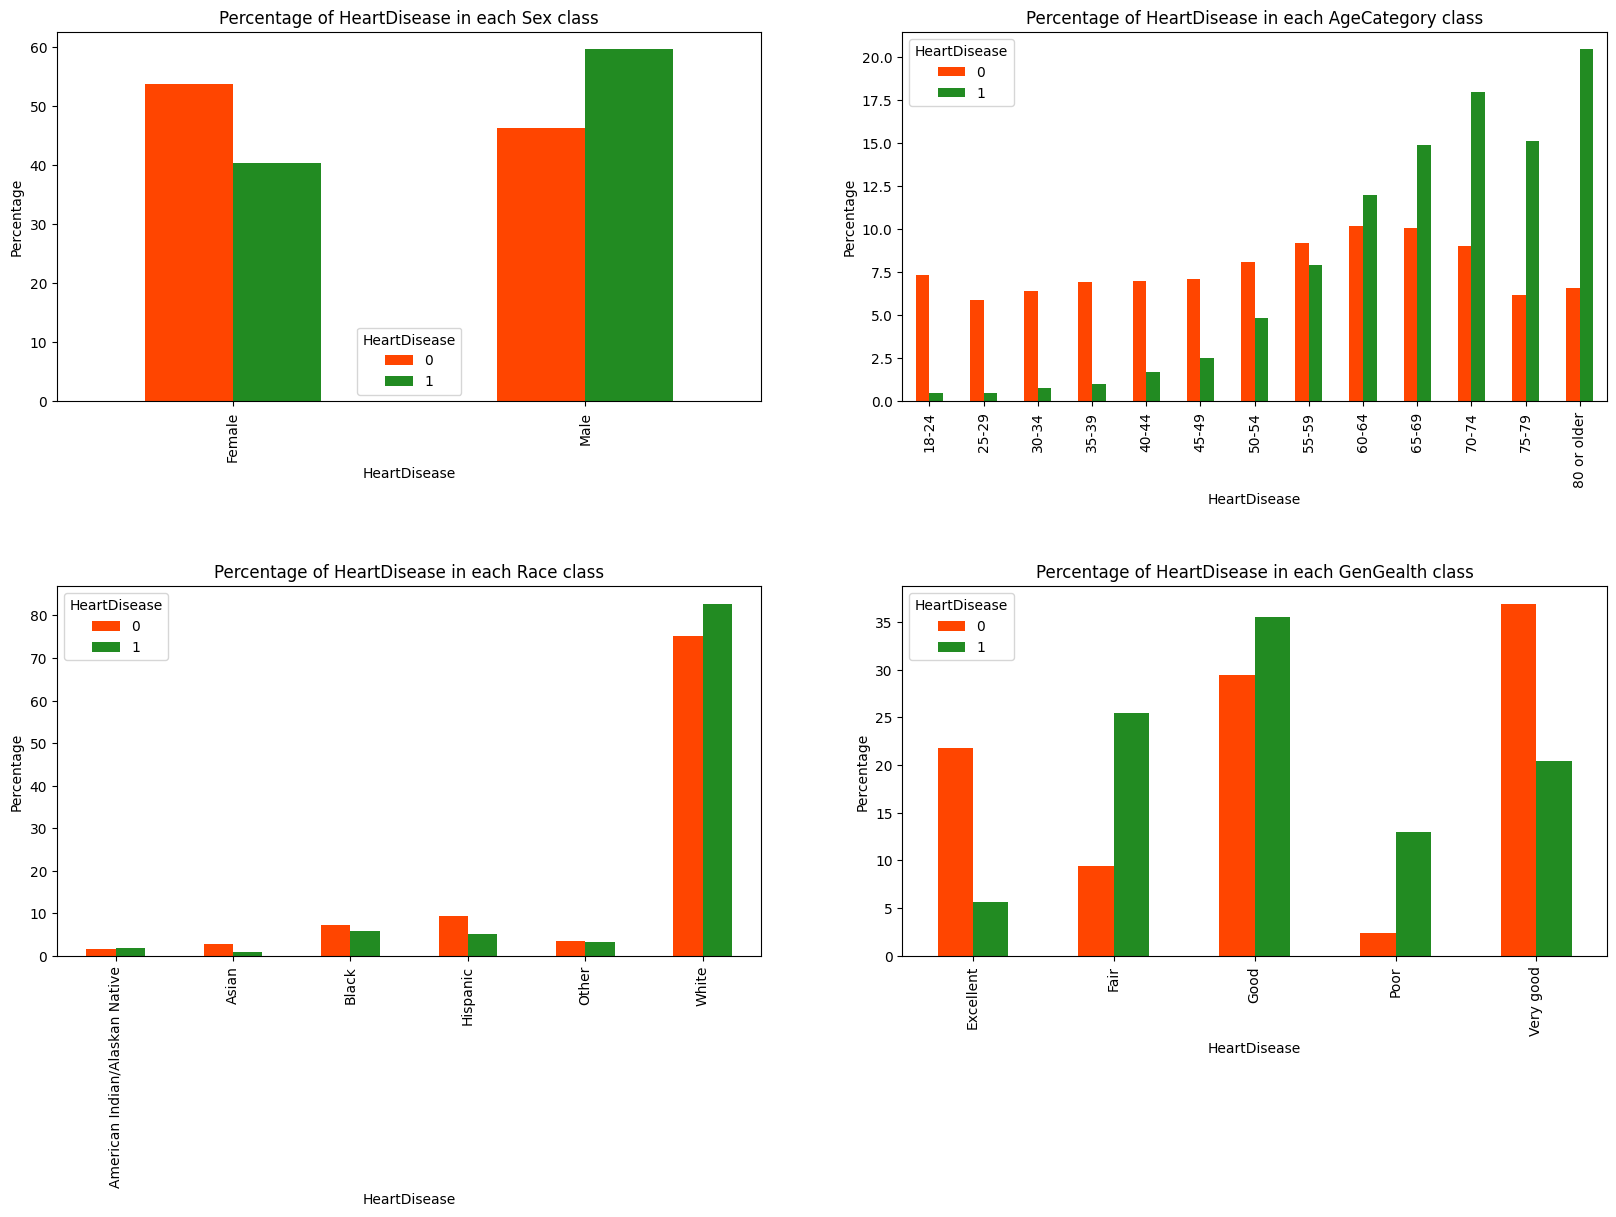

In [31]:
fig, ax = plt.subplots(2, 2, figsize = (20, 12))

a_df.groupby('HeartDisease')['Sex'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each Sex class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[0,0])

a_df.groupby('HeartDisease')['AgeCategory'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each AgeCategory class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[0,1])

a_df.groupby('HeartDisease')['Race'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each Race class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[1,0])

a_df.groupby('HeartDisease')['GenHealth'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each GenGealth class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[1,1])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

Looking at the percentage of heart disease in each class, more individuals with an age above 50 have heart disease as compared to the younger individuals. Although the general health of patients are fair/good/verygood, majority of them still have heart diseases.

## Ordinal Encoding

AgeCategory and GenHealth can be ordered by their values. Therefore I will use label encoding to transform them into numbers rather than One-hot encoding.

In [32]:
# Convert the loan default on file to numeric rather than categorical data.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert
a_df['AgeCategory'] = label_encoder.fit_transform(a_df['AgeCategory'])

In [33]:
print("Original Value => Transformed Value\n")
for i in range(len(label_encoder.classes_)):
    print(label_encoder.classes_[i],"=>",i)

Original Value => Transformed Value

18-24 => 0
25-29 => 1
30-34 => 2
35-39 => 3
40-44 => 4
45-49 => 5
50-54 => 6
55-59 => 7
60-64 => 8
65-69 => 9
70-74 => 10
75-79 => 11
80 or older => 12


In [34]:
# Replace GenHealth based on their order of health status. 
a_df['GenHealth'] = a_df['GenHealth'].replace(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], [0,1,2,3,4])

In [35]:
a_df = a_df.drop(columns=['Diabetic', 'Stroke', 'SkinCancer'])

C:\Users\fangg\AppData\Local\Temp\ipykernel_720\2396648642.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


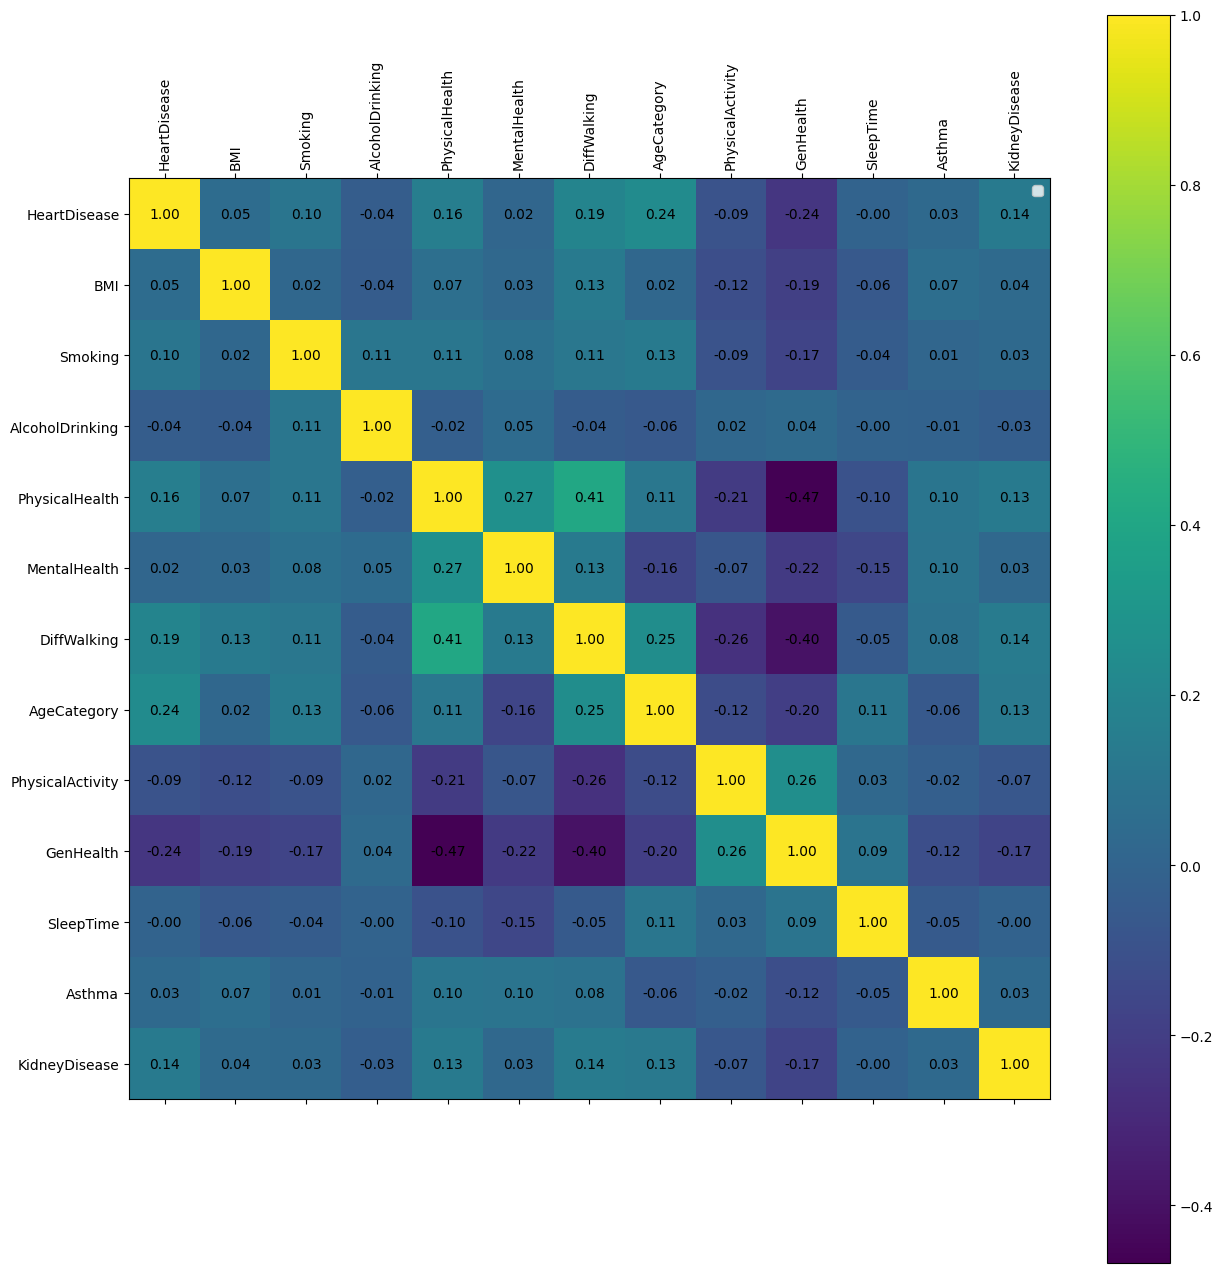

In [36]:
import matplotlib.pyplot as plt

def plot_corr(df,size=13):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            text = f"{corr.iloc[i, j]:.2f}"  # Format the coefficient to two decimal places
            ax.text(i, j, text, va='center', ha='center', color='black', fontsize=10)

    plt.tight_layout()

    
plot_corr(a_df)

No highly correlated columns. 

## One-Hot Encoding

For columns that do not have an order, I will use one-hot encoding.

In [37]:
categorical_columns = a_df.select_dtypes(include='object').columns.tolist()

In [38]:
columns_to_replace = [column for column in categorical_columns if 0 not in list(a_df[column].unique())]

In [39]:
print("One hot encoding will be performed on the follow columns:\n",columns_to_replace)

One hot encoding will be performed on the follow columns:
 ['Sex', 'Race']


In [40]:
a_df = pd.get_dummies(data=a_df, columns=columns_to_replace)

In [41]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288362 entries, 0 to 319642
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         288362 non-null  int64  
 1   BMI                                  288362 non-null  float64
 2   Smoking                              288362 non-null  int64  
 3   AlcoholDrinking                      288362 non-null  int64  
 4   PhysicalHealth                       288362 non-null  float64
 5   MentalHealth                         288362 non-null  float64
 6   DiffWalking                          288362 non-null  int64  
 7   AgeCategory                          288362 non-null  int32  
 8   PhysicalActivity                     288362 non-null  int64  
 9   GenHealth                            288362 non-null  int64  
 10  SleepTime                            288362 non-null  float64
 11  Asthma       

In [42]:
a_df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  PhysicalHealth  \
0             0  31.19        0                0             0.0   
1             0  23.24        0                0             0.0   
2             0  32.92        0                0            10.0   
3             0  31.75        1                0             0.0   
4             0  19.74        0                0             0.0   

   MentalHealth  DiffWalking  AgeCategory  PhysicalActivity  GenHealth  ...  \
0           0.0            0            4                 1          4  ...   
1           0.0            0            9                 1          3  ...   
2           3.0            0            5                 1          1  ...   
3           3.0            0            5                 1          1  ...   
4           1.0            0            7                 1          4  ...   

   Asthma  KidneyDisease  Sex_Female  Sex_Male  \
0       0              0           0         1   
1       0              1           1         0   
2       0              0           1         0   
3       0              0           0         1   
4       0              0           1         0   

   Race_American Indian/Alaskan Native  Race_Asian  Race_Black  Race_Hispanic  \
0                                    0           0           0              0   
1                                    0           0           0              0   
2                                    0           0           0              0   
3                                    0           0           0              0   
4                                    0           0           0              0   

   Race_Other  Race_White  
0           0           1  
1           0           1  
2           0           1  
3           0           1  
4           0           1  

[5 rows x 21 columns]

In [43]:
a_df = a_df.drop(columns=['Sex_Female','Sex_Male','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White'])

## Models

In [44]:
# Initialize some variables to store the metrics
names = []
f1 = []
roc_auc = []
accuracy = []
precision = []
recall = []

state = 42

models = []

models.append(('GradientBoosting', GradientBoostingClassifier(random_state=state)))
models.append(('LogisticRegression', LogisticRegression(random_state=state)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=state)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=state, n_jobs=5)))
models.append(('LinearSVC', LinearSVC(random_state=state)))

print(models)

[('GradientBoosting', GradientBoostingClassifier(random_state=42)), ('LogisticRegression', LogisticRegression(random_state=42)), ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)), ('RandomForestClassifier', RandomForestClassifier(n_jobs=5, random_state=42)), ('LinearSVC', LinearSVC(random_state=42))]


## Data Balancing and Model Training

Since my goal is to help HCA improve their detection of patients who are likely to have HeartDisease, I will aim to maximize the recall rate (reduce number of false negatives) while ensuring that the precision (number of false positives) does not differ much.

I will sort the models based on their recall.

### 1. Data Balancing with Random Undersampling, 40:60 ratio.

I will balance the 1s and 0s to a ratio of 40:60 to ensure the 0s class (does not have heartdisease) remains as the majority class and retains more of its original data, without the model being biased toward the 0s class.

Total records: 63782


occurrences occurrences (%)
0        38269           60.0%
1        25513           40.0%

Looking at the distribution of classes in the target column (HeartDisease):


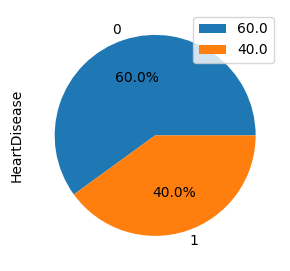

In [45]:
target_column = 'HeartDisease'
dataframe = a_df

number_for_sixty = (len(dataframe[dataframe[target_column]==1])/40)*60

df2 = pd.concat([dataframe[dataframe[target_column]==0].sample(n=int(number_for_sixty), random_state=42), dataframe[dataframe[target_column]==1]], axis=0)
df_under = df2.reset_index(drop=True)

dataframe = df_under

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

print("Looking at the distribution of classes in the target column (HeartDisease):")

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [46]:
x_udf = df_under.drop(columns=target_column)
y_udf = df_under[target_column]

# Let split the data into train and testing
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_udf, y_udf, test_size=0.2, random_state=42)

In [47]:
# Testing the individual model's classification accuracy

for name,model in models:
    print("Training model",name,"now.")
    model.fit(x_train_under, y_train_under)
    y_predict = model.predict(x_test_under)
    
    name = name + " at a 40:60 ratio"
    names.append(name)
    f1.append(f1_score(y_test_under, y_predict))
    roc_auc.append(roc_auc_score(y_test_under, y_predict))
    accuracy.append(accuracy_score(y_test_under, y_predict))
    precision.append(precision_score(y_test_under, y_predict))
    recall.append(recall_score(y_test_under, y_predict))
    
metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

Training model GradientBoosting now.
Training model LogisticRegression now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training model DecisionTreeClassifier now.
Training model RandomForestClassifier now.
Training model LinearSVC now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2. Data Balancing with Random Undersampling, 50:50 ratio.

I will balance the 1s and 0s to a ratio of 50:50 to ensure equal representation of data in both models.

Total records: 51026


occurrences occurrences (%)
0        25513           50.0%
1        25513           50.0%

Looking at the distribution of classes in the target column (HeartDisease):


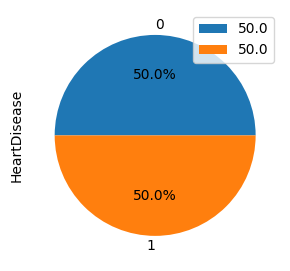

In [48]:
target_column = 'HeartDisease'
dataframe = a_df

number_for_sixty = len(dataframe[dataframe[target_column]==1])

df2 = pd.concat([dataframe[dataframe[target_column]==0].sample(n=int(number_for_sixty), random_state=42), dataframe[dataframe[target_column]==1]], axis=0)
df_under = df2.reset_index(drop=True)

dataframe = df_under

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

print("Looking at the distribution of classes in the target column (HeartDisease):")

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [49]:
x_udf = df_under.drop(columns=target_column)
y_udf = df_under[target_column]

# Let split the data into train and testing
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_udf, y_udf, test_size=0.2, random_state=42)

In [50]:
# Testing the individual model's classification accuracy

for name,model in models:
    print("Training model",name,"now.")
    model.fit(x_train_under, y_train_under)
    y_predict = model.predict(x_test_under)
    
    name = name + " at a 50:50 ratio"
    names.append(name)
    f1.append(f1_score(y_test_under, y_predict))
    roc_auc.append(roc_auc_score(y_test_under, y_predict))
    accuracy.append(accuracy_score(y_test_under, y_predict))
    precision.append(precision_score(y_test_under, y_predict))
    recall.append(recall_score(y_test_under, y_predict))
    
metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False)

styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

Training model GradientBoosting now.
Training model LogisticRegression now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training model DecisionTreeClassifier now.
Training model RandomForestClassifier now.
Training model LinearSVC now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


50:50 ratio seems to achieve better results than a 40:60 ratio. Therefore, I will use a 50:50 ratio.

### 3. Data Balancing with SMOTE and Undersampling, 50:50 ratio.

I will balance the 1s and 0s to a ratio of 50:50 to ensure equal representation of data in both models. I will create Synthetic data for the unbalanced class: 1 and reduce the size of the populated class: 0.

In [51]:
X = a_df.drop(columns=['HeartDisease'])
y = a_df['HeartDisease']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=state)

In [53]:
combined_df = pd.concat([X_train, y_train], axis=1)
combined_df.head()

BMI  Smoking  AlcoholDrinking  PhysicalHealth  MentalHealth  \
161689  23.63        1                0             0.0           0.0   
263153  26.31        0                0            12.0           0.0   
129479  33.05        1                0             1.0           0.0   
240415  41.09        1                0             0.0           0.0   
66902   20.98        0                0             0.0          15.0   

        DiffWalking  AgeCategory  PhysicalActivity  GenHealth  SleepTime  \
161689            1           10                 0          0        6.0   
263153            0            0                 1          2        6.0   
129479            0            8                 1          4        7.0   
240415            0            2                 1          3        7.0   
66902             0            0                 1          4        8.0   

        Asthma  KidneyDisease  HeartDisease  
161689       0              0             1  
263153       0              0             0  
129479       0              0             0  
240415       0              0             0  
66902        0              0             0

In [54]:
combined_df.HeartDisease.value_counts()

0    210279
1     20410
Name: HeartDisease, dtype: int64

Total records: 68033


occurrences occurrences (%)
0        47623           70.0%
1        20410           30.0%

Looking at the distribution of classes in the target column (HeartDisease):


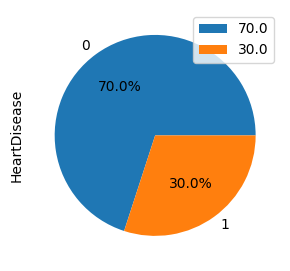

In [55]:
target_column = 'HeartDisease'
dataframe = combined_df

number_for_sixty = (len(dataframe[dataframe[target_column]==1])/30)*70

df2 = pd.concat([dataframe[dataframe[target_column]==0].sample(n=int(number_for_sixty), random_state=42), dataframe[dataframe[target_column]==1]], axis=0)
df_under = df2.reset_index(drop=True)

dataframe = df_under

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

print("Looking at the distribution of classes in the target column (HeartDisease):")

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [56]:
df_under.HeartDisease.value_counts()

0    47623
1    20410
Name: HeartDisease, dtype: int64

In [57]:
# Separate features and labels
X = df_under.drop('HeartDisease', axis=1)
y = df_under['HeartDisease']

smote = SMOTE(sampling_strategy={1:len(df_under[df_under['HeartDisease']==0])}, random_state=42)

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X, y)

# Now you have a balanced DataFrame with the desired ratio
df_smote = pd.concat([x_smote , y_smote], axis=1)

In [58]:
df_smote.HeartDisease.value_counts()

0    47623
1    47623
Name: HeartDisease, dtype: int64

In [59]:
combined_test_df = pd.concat([X_test, y_test], axis=1)
combined_test_df.head()

BMI  Smoking  AlcoholDrinking  PhysicalHealth  MentalHealth  \
160960  34.02        1                0             0.0           0.0   
212607  26.68        0                0            15.0          20.0   
154608  19.14        0                0            30.0          30.0   
75103   35.87        1                0             0.0           5.0   
176437  35.36        1                0             0.0           0.0   

        DiffWalking  AgeCategory  PhysicalActivity  GenHealth  SleepTime  \
160960            0            4                 1          3        7.0   
212607            1           12                 1          2        5.0   
154608            0            9                 0          3        6.0   
75103             0            0                 1          3        7.0   
176437            0            3                 1          2        6.0   

        Asthma  KidneyDisease  HeartDisease  
160960       1              0             0  
212607       0              0             0  
154608       0              0             0  
75103        0              0             0  
176437       1              0             0

In [60]:
combined_test_df.HeartDisease.value_counts()

0    52570
1     5103
Name: HeartDisease, dtype: int64

Total records: 10206


occurrences occurrences (%)
0         5103           50.0%
1         5103           50.0%

Looking at the distribution of classes in the target column (HeartDisease):


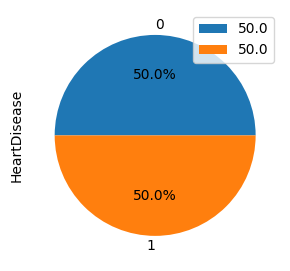

In [61]:
target_column = 'HeartDisease'
dataframe = combined_test_df

number_for_fifty = len(dataframe[dataframe[target_column]==1])

df2 = pd.concat([dataframe[dataframe[target_column]==0].sample(n=int(number_for_fifty), random_state=42), dataframe[dataframe[target_column]==1]], axis=0)
df_under = df2.reset_index(drop=True)

dataframe = df_under

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

print("Looking at the distribution of classes in the target column (HeartDisease):")

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [62]:
x_train_under,y_train_under = df_smote.drop(columns=['HeartDisease']),df_smote['HeartDisease']
x_test_under,y_test_under = df_under.drop(columns=['HeartDisease']),df_under['HeartDisease']

In [63]:
# Testing the individual model's classification accuracy

for name,model in models:
    print("Training model",name,"now.")
    model.fit(x_train_under, y_train_under)
    y_predict = model.predict(x_test_under)
    
    name = name + " at a 50:50 ratio after SMOTE"
    names.append(name)
    f1.append(f1_score(y_test_under, y_predict))
    roc_auc.append(roc_auc_score(y_test_under, y_predict))
    accuracy.append(accuracy_score(y_test_under, y_predict))
    precision.append(precision_score(y_test_under, y_predict))
    recall.append(recall_score(y_test_under, y_predict))
    
metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False)

styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

Training model GradientBoosting now.
Training model LogisticRegression now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training model DecisionTreeClassifier now.
Training model RandomForestClassifier now.
Training model LinearSVC now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Conclusion: A 50:50 undersampling ratio along with the Logistic Regression model seems to perform the best among the other models and data balancing methods. Therefore, I will attempt tuning of the models with the 50:50 undersampling ratio.

# Model Development and Tuning

I will attempt tuning LinearSVC, Logistic Regression, Gradient Boosting, and Random Forest at a 50:50 ratio since majority of the model performed best at a 50:50 ratio.

In [64]:
lr = LogisticRegression(random_state=state)
lr.fit(x_train_under, y_train_under)

C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Total records: 51026


occurrences occurrences (%)
0        25513           50.0%
1        25513           50.0%

Looking at the distribution of classes in the target column (HeartDisease):


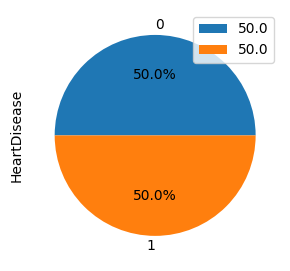

In [65]:
target_column = 'HeartDisease'
dataframe = a_df

number_for_sixty = len(dataframe[dataframe[target_column]==1])

df2 = pd.concat([dataframe[dataframe[target_column]==0].sample(n=int(number_for_sixty), random_state=42), dataframe[dataframe[target_column]==1]], axis=0)
df_under = df2.reset_index(drop=True)

dataframe = df_under

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

print("Looking at the distribution of classes in the target column (HeartDisease):")

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [66]:
x_udf = df_under.drop(columns=target_column)
y_udf = df_under[target_column]

# Let split the data into train and testing
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_udf, y_udf, test_size=0.2, random_state=42)

## Tuning Logistic Regression Model

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      5033
           1       0.73      0.75      0.74      5173

    accuracy                           0.73     10206
   macro avg       0.73      0.73      0.73     10206
weighted avg       0.73      0.73      0.73     10206



Text(0.5, 6.8833333333333275, 'Predicted')

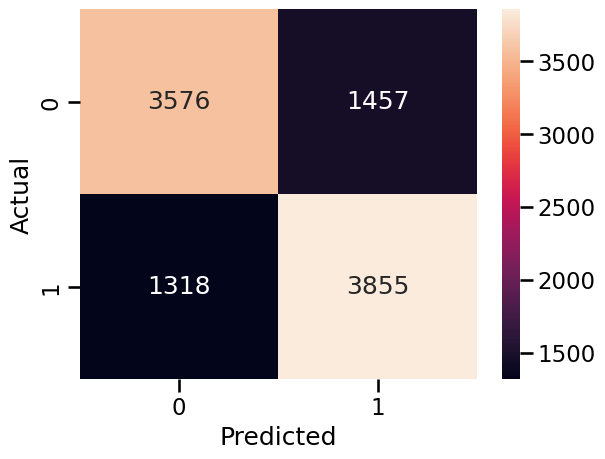

In [67]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [68]:
# Testing the individual model's classification accuracy

# Initialize some variables to store the metrics
names = []
f1 = []
roc_auc = []
accuracy = []
precision = []
recall = []

models = []
models.append(('LogisticRegression with default settings', LogisticRegression(random_state=state)))
models.append(('LogisticRegression with liblinear solver', LogisticRegression(random_state=state, solver='liblinear')))
models.append(('LogisticRegression with liblinear solver and C value of 2', LogisticRegression(random_state=state, solver='liblinear', C=2)))
models.append(('LogisticRegression with liblinear solver and C value of 0.5', LogisticRegression(random_state=state, solver='liblinear', C=0.5)))

for name,model in models:
    print("Training model",name,"now.")
    model.fit(x_train_under, y_train_under)
    y_predict = model.predict(x_test_under)
    
    names.append(name)
    f1.append(f1_score(y_test_under, y_predict))
    roc_auc.append(roc_auc_score(y_test_under, y_predict))
    accuracy.append(accuracy_score(y_test_under, y_predict))
    precision.append(precision_score(y_test_under, y_predict))
    recall.append(recall_score(y_test_under, y_predict))

metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False)

styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

Training model LogisticRegression with default settings now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training model LogisticRegression with liblinear solver now.
Training model LogisticRegression with liblinear solver and C value of 2 now.
Training model LogisticRegression with liblinear solver and C value of 0.5 now.


In [69]:
lr = LogisticRegression(random_state=state)
lr.fit(x_train_under, y_train_under)

C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5033
           1       0.73      0.77      0.75      5173

    accuracy                           0.74     10206
   macro avg       0.74      0.74      0.74     10206
weighted avg       0.74      0.74      0.74     10206



Text(0.5, 6.8833333333333275, 'Predicted')

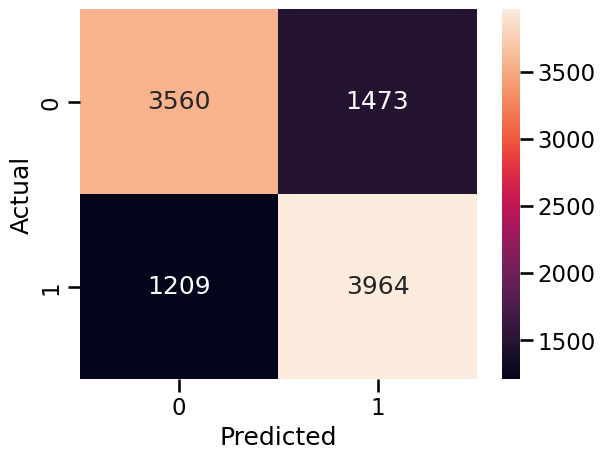

In [70]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [71]:
precision_results = []
recall_results = []
model_name = []

report = classification_report(y_test_under, y_predict, output_dict=True)

precision_class_1 = report['1']['precision']
recall_class_1 = report['1']['recall']

precision_results.append(precision_class_1)
recall_results.append(recall_class_1)
model_name.append('LogisticRegression')

## Tuning LinearSVC Model

In [72]:
lr = LinearSVC(random_state=state)

lr.fit(x_train_under, y_train_under)

C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      5033
           1       0.69      0.84      0.76      5173

    accuracy                           0.73     10206
   macro avg       0.74      0.73      0.72     10206
weighted avg       0.74      0.73      0.72     10206



Text(0.5, 6.8833333333333275, 'Predicted')

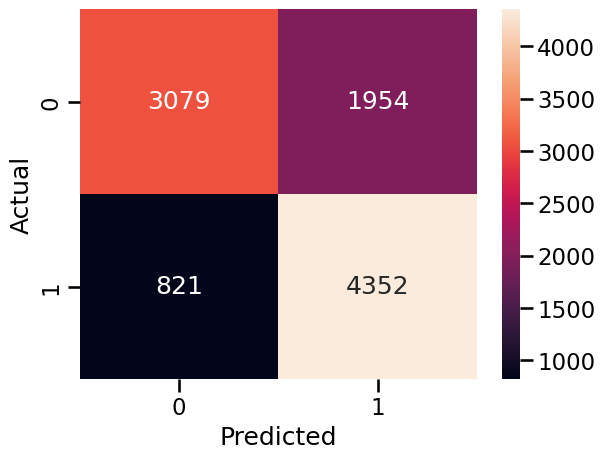

In [73]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [74]:
# Testing the individual model's classification accuracy

# Initialize some variables to store the metrics
names = []
f1 = []
roc_auc = []
accuracy = []
precision = []
recall = []

models = []
models.append(('LinearSVC with default settings', LinearSVC(random_state=state)))
models.append(('LinearSVC with loss hinge', LinearSVC(random_state=state, loss='hinge')))
models.append(('LinearSVC with C value of 1.1', LinearSVC(random_state=state, C=1.1)))
models.append(('LinearSVC with C value of 0.9', LinearSVC(random_state=state, C=0.9)))

for name,model in models:
    print("Training model",name,"now.")
    model.fit(x_train_under, y_train_under)
    y_predict = model.predict(x_test_under)
    
    names.append(name)
    f1.append(f1_score(y_test_under, y_predict))
    roc_auc.append(roc_auc_score(y_test_under, y_predict))
    accuracy.append(accuracy_score(y_test_under, y_predict))
    precision.append(precision_score(y_test_under, y_predict))
    recall.append(recall_score(y_test_under, y_predict))

metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False)

styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

Training model LinearSVC with default settings now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training model LinearSVC with loss hinge now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training model LinearSVC with C value of 1.1 now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training model LinearSVC with C value of 0.9 now.


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Although the LinearSVC has the highest precision scores, it also has low recall of 0.43. There is a huge gap between the precision and recall, which could indicate that the LinearSVC is sensitive to capturing positive instances but struggles to distinguish between true and false positives.

Instead, I look at the third model as it's precision and recall are >70% and are relatively similar. 

In [75]:
lr = LinearSVC(random_state=state, loss='hinge')

lr.fit(x_train_under, y_train_under)

C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge', random_state=42)

In [76]:
y_predict = model.predict(x_test_under)

print(f1_score(y_test_under, y_predict))
print(roc_auc_score(y_test_under, y_predict))
print(accuracy_score(y_test_under, y_predict))
print(precision_score(y_test_under, y_predict))
print(recall_score(y_test_under, y_predict))

0.7411074440777411
0.7224924429751463
0.7233000195963158
0.7047951176983435
0.7813647786584187


              precision    recall  f1-score   support

           0       0.80      0.61      0.69      5033
           1       0.69      0.85      0.76      5173

    accuracy                           0.73     10206
   macro avg       0.75      0.73      0.73     10206
weighted avg       0.75      0.73      0.73     10206



Text(0.5, 6.8833333333333275, 'Predicted')

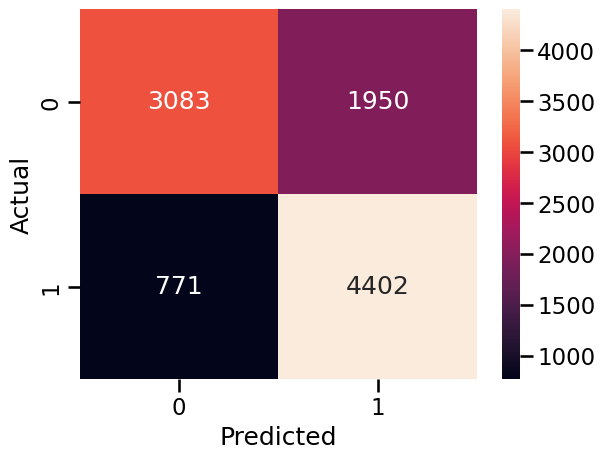

In [77]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

LinearSVC's precision is quite high at 77% and has a recall of 65% for the 1 class. However, the False Negative rates are quite high. 

I will append the LinearSVC's result.

In [78]:
report = classification_report(y_test_under, y_predict, output_dict=True)

precision_class_1 = report['1']['precision']
recall_class_1 = report['1']['recall']

precision_results.append(precision_class_1)
recall_results.append(recall_class_1)
model_name.append('LinearSVC')

## Tuning Random Forest Model

Although logistic regression is the best model, linear models do not have feature importance scores to tell us which features are important. The Random Forest classifier metrics does not differ much from the Logistic Regression. Therefore, I will see the feature importances in Random Forest.

Tree-based models have feature importance scores to identify which features are most influential in making predictions and which predictions contribute more to the model's overall performance.

In [79]:
lr = RandomForestClassifier(random_state=state)

lr.fit(x_train_under, y_train_under)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      5033
           1       0.70      0.73      0.72      5173

    accuracy                           0.71     10206
   macro avg       0.71      0.71      0.71     10206
weighted avg       0.71      0.71      0.71     10206



Text(0.5, 6.8833333333333275, 'Predicted')

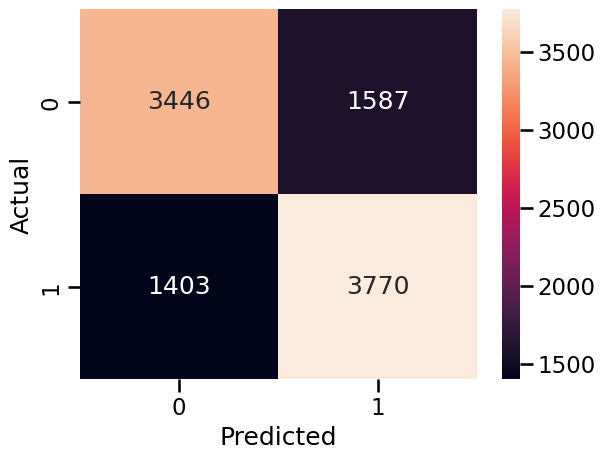

In [80]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [81]:
# Testing the individual model's classification accuracy

# Initialize some variables to store the metrics
names = []
f1 = []
roc_auc = []
accuracy = []
precision = []
recall = []

models = []
models.append(('RandomForestClassifier with default settings', RandomForestClassifier(random_state=state)))
models.append(('RandomForestClassifier with entropy criterion', RandomForestClassifier(random_state=state, criterion='entropy')))
models.append(('RandomForestClassifier with min samples split 10', RandomForestClassifier(random_state=state, min_samples_split=10)))
models.append(('RandomForestClassifier with min samples leaf 4', RandomForestClassifier(random_state=state, min_samples_leaf=4)))

for name,model in models:
    print("Training model",name,"now.")
    model.fit(x_train_under, y_train_under)
    y_predict = model.predict(x_test_under)
    
    names.append(name)
    f1.append(f1_score(y_test_under, y_predict))
    roc_auc.append(roc_auc_score(y_test_under, y_predict))
    accuracy.append(accuracy_score(y_test_under, y_predict))
    precision.append(precision_score(y_test_under, y_predict))
    recall.append(recall_score(y_test_under, y_predict))

metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False)

styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

Training model RandomForestClassifier with default settings now.
Training model RandomForestClassifier with entropy criterion now.
Training model RandomForestClassifier with min samples split 10 now.
Training model RandomForestClassifier with min samples leaf 4 now.


Let's try iterating through some values for min_samples_leaf and min_samples_split

In [82]:
split_size = [j for j in range(4,16,4)]
samples_leaf_size = [j for j in range(3,16,2)]

In [83]:
names = []
f1 = []
roc_auc = []
accuracy = []
precision = []
recall = []

for i in split_size:
    for j in samples_leaf_size:
        lr = RandomForestClassifier(random_state=state, min_samples_split=i, min_samples_leaf=j, n_jobs=5)
        lr.fit(x_train_under, y_train_under)
        y_predict = lr.predict(x_test_under)
        
        name = 'min split size:',i,'with min samples leaf size:',j
        names.append(name)
        f1.append(f1_score(y_test_under, y_predict))
        roc_auc.append(roc_auc_score(y_test_under, y_predict))
        accuracy.append(accuracy_score(y_test_under, y_predict))
        precision.append(precision_score(y_test_under, y_predict))
        recall.append(recall_score(y_test_under, y_predict))

metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False).head()

styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

In [84]:
lr = RandomForestClassifier(random_state=state, min_samples_split=4, min_samples_leaf=9, n_jobs=5)
lr.fit(x_train_under, y_train_under)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=4, n_jobs=5,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      5033
           1       0.72      0.79      0.75      5173

    accuracy                           0.74     10206
   macro avg       0.74      0.74      0.74     10206
weighted avg       0.74      0.74      0.74     10206



Text(0.5, 6.8833333333333275, 'Predicted')

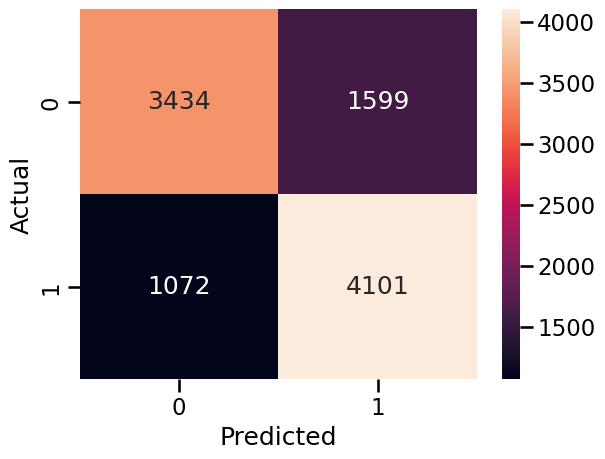

In [85]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

Random Forest's performance after tuning is almost similar to the Logistic Regression model. However, the difference between precision and recall is higher, 0.07 compared to 0.03 in Logistic Regression. Since this model performs better at identifying patients who are likely to get HeartDisease, I will use the Random Forest model instead.

In [86]:
report = classification_report(y_test_under, y_predict, output_dict=True)

precision_class_1 = report['1']['precision']
recall_class_1 = report['1']['recall']

precision_results.append(precision_class_1)
recall_results.append(recall_class_1)
model_name.append('RandomForestClassifier')

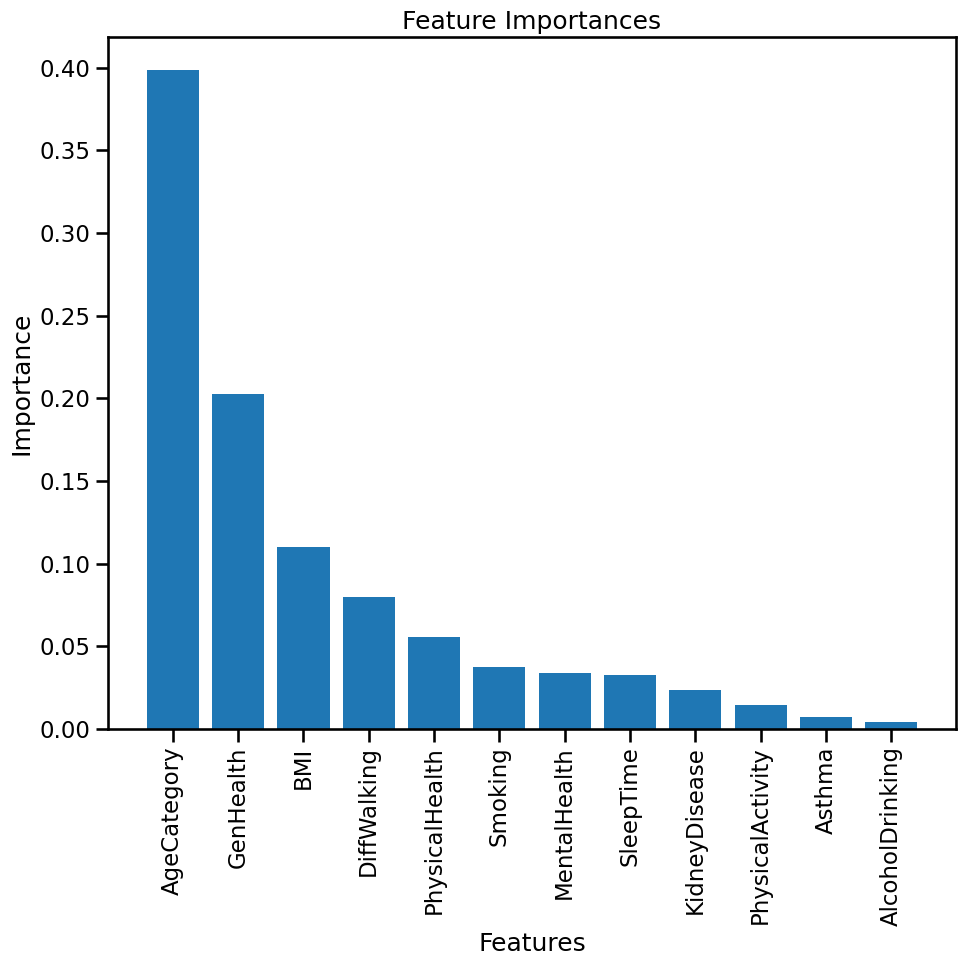

In [87]:
feature_importance_df = pd.DataFrame({'Feature': df_under.columns.tolist()[1:], 'Importance': lr.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 10))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [88]:
high_importance = feature_importance_df[feature_importance_df['Importance']>0.015]['Feature'].tolist()

In [89]:
high_importance

['AgeCategory',
 'GenHealth',
 'BMI',
 'DiffWalking',
 'PhysicalHealth',
 'Smoking',
 'MentalHealth',
 'SleepTime',
 'KidneyDisease']

In [90]:
lr = RandomForestClassifier(random_state=state, min_samples_split=4, min_samples_leaf=9, n_jobs=5)

x_train_under_important = x_train_under[high_importance]
lr.fit(x_train_under_important, y_train_under)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=4, n_jobs=5,
                       random_state=42)

In [91]:
x_test_under_important = x_test_under[high_importance]
y_predict = lr.predict(x_test_under_important)

print("F1 score:",f1_score(y_test_under, y_predict))
print("ROC AUC score:",roc_auc_score(y_test_under, y_predict))
print("Accuracy score:",accuracy_score(y_test_under, y_predict))
print("Precision score:",precision_score(y_test_under, y_predict))
print("Recall score:",recall_score(y_test_under, y_predict))

F1 score: 0.7518201087457377
ROC AUC score: 0.7354070711114493
Accuracy score: 0.7361356065059769
Precision score: 0.7183867558999648
Recall score: 0.7885173013725111


              precision    recall  f1-score   support

           0       0.76      0.68      0.72      5033
           1       0.72      0.79      0.75      5173

    accuracy                           0.74     10206
   macro avg       0.74      0.74      0.74     10206
weighted avg       0.74      0.74      0.74     10206



Text(0.5, 6.8833333333333275, 'Predicted')

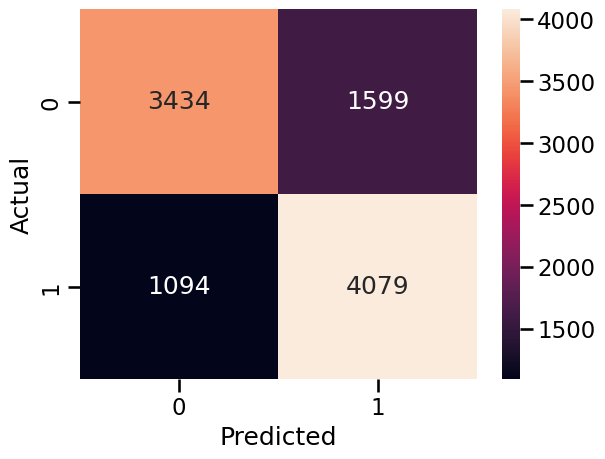

In [92]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under_important)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

The model results does not change much after removing the low importance features.

## Tuning Gradient Boosting Classifier

In [93]:
lr = GradientBoostingClassifier(random_state=state)
lr.fit(x_train_under, y_train_under)

GradientBoostingClassifier(random_state=42)

In [94]:
# Testing the individual model's classification accuracy

# Initialize some variables to store the metrics
names = []
f1 = []
roc_auc = []
accuracy = []
precision = []
recall = []

models = []
models.append(('GradientBoostingClassifier with default settings', GradientBoostingClassifier(random_state=state)))
models.append(('GradientBoostingClassifier with min samples split 10', GradientBoostingClassifier(random_state=state, min_samples_split=10)))
models.append(('GradientBoostingClassifier with min samples leaf 4', GradientBoostingClassifier(random_state=state, min_samples_leaf=4)))
models.append(('GradientBoostingClassifier with 150 estimators', GradientBoostingClassifier(random_state=state, n_estimators=150)))
models.append(('GradientBoostingClassifier with learning rate of 0.08', GradientBoostingClassifier(random_state=state, learning_rate=0.08)))

for name,model in models:
    print("Training model",name,"now.")
    model.fit(x_train_under, y_train_under)
    y_predict = model.predict(x_test_under)
    
    names.append(name)
    f1.append(f1_score(y_test_under, y_predict))
    roc_auc.append(roc_auc_score(y_test_under, y_predict))
    accuracy.append(accuracy_score(y_test_under, y_predict))
    precision.append(precision_score(y_test_under, y_predict))
    recall.append(recall_score(y_test_under, y_predict))

metric_comparison = pd.DataFrame({'Name':names, 'F1_Score':f1, 'ROC_AUC':roc_auc, "Accuracy":accuracy, "Precision":precision, "Recall":recall})
metric_comparison = metric_comparison.sort_values(by='Recall', ascending=False)

styled_metric_comparison = metric_comparison.style.apply(highlight_max, subset=['F1_Score', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall'])

styled_metric_comparison

Training model GradientBoostingClassifier with default settings now.
Training model GradientBoostingClassifier with min samples split 10 now.
Training model GradientBoostingClassifier with min samples leaf 4 now.
Training model GradientBoostingClassifier with 150 estimators now.
Training model GradientBoostingClassifier with learning rate of 0.08 now.


In [95]:
lr = GradientBoostingClassifier(random_state=state, learning_rate=0.08)
lr.fit(x_train_under, y_train_under)

GradientBoostingClassifier(learning_rate=0.08, random_state=42)

              precision    recall  f1-score   support

           0       0.77      0.69      0.72      5033
           1       0.72      0.80      0.76      5173

    accuracy                           0.74     10206
   macro avg       0.74      0.74      0.74     10206
weighted avg       0.74      0.74      0.74     10206



Text(0.5, 6.8833333333333275, 'Predicted')

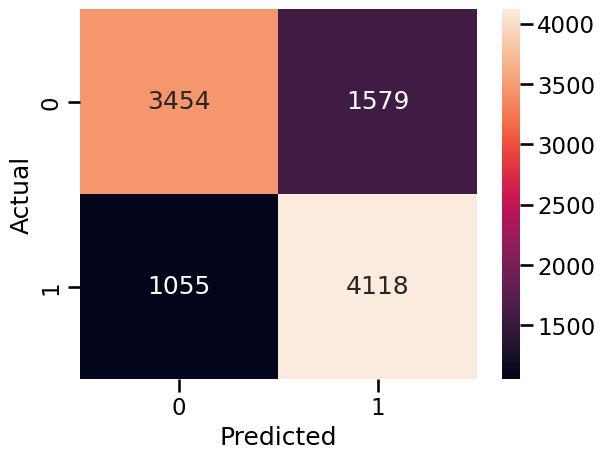

In [96]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [97]:
report = classification_report(y_test_under, y_predict, output_dict=True)

precision_class_1 = report['1']['precision']
recall_class_1 = report['1']['recall']

precision_results.append(precision_class_1)
recall_results.append(recall_class_1)
model_name.append('GradientBoostingClassifier')

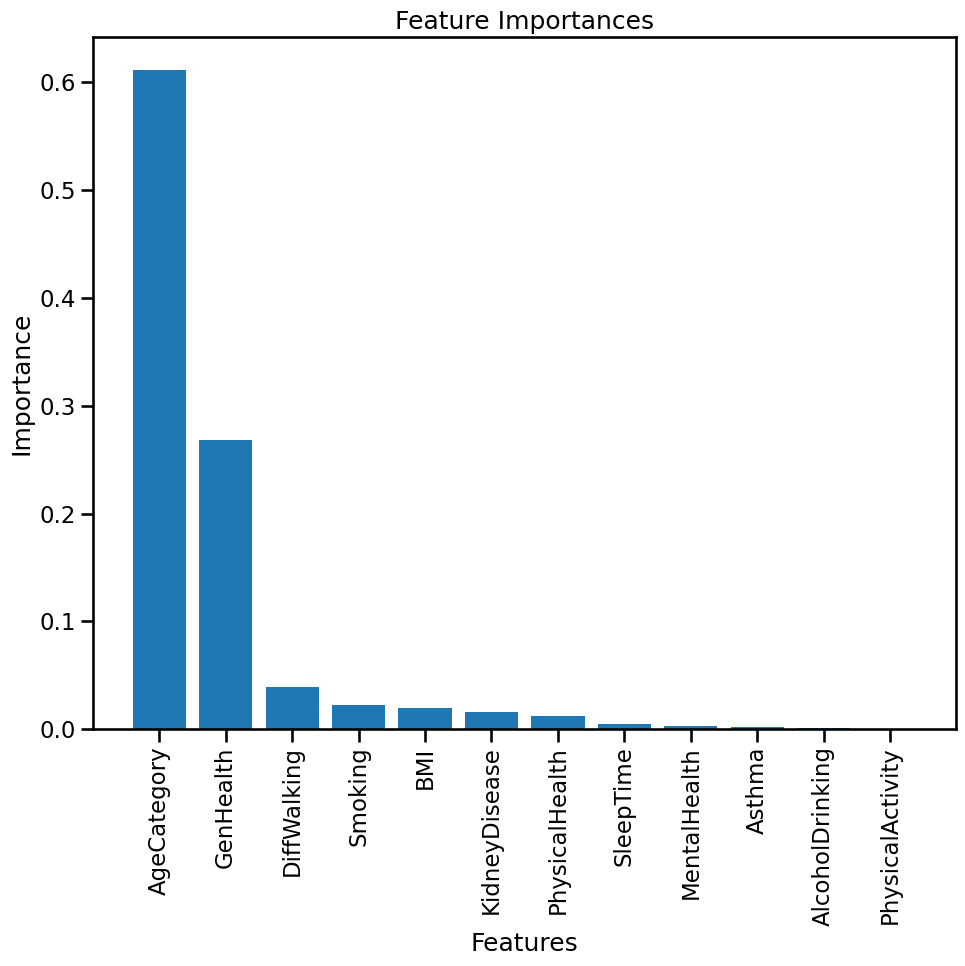

In [98]:
feature_importance_df = pd.DataFrame({'Feature': df_under.columns.tolist()[1:], 'Importance': lr.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 10))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [99]:
high_importance = feature_importance_df[feature_importance_df['Importance']>0.015]['Feature'].tolist()

In [100]:
high_importance

['AgeCategory', 'GenHealth', 'DiffWalking', 'Smoking', 'BMI', 'KidneyDisease']

In [101]:
lr = GradientBoostingClassifier(random_state=state, learning_rate=0.08)

x_train_under_important = x_train_under[high_importance]
lr.fit(x_train_under_important, y_train_under)

GradientBoostingClassifier(learning_rate=0.08, random_state=42)

In [102]:
x_test_under_important = x_test_under[high_importance]
y_predict = lr.predict(x_test_under_important)

print("F1 score:",f1_score(y_test_under, y_predict))
print("ROC AUC score:",roc_auc_score(y_test_under, y_predict))
print("Accuracy score:",accuracy_score(y_test_under, y_predict))
print("Precision score:",precision_score(y_test_under, y_predict))
print("Recall score:",recall_score(y_test_under, y_predict))

F1 score: 0.7569801616458486
ROC AUC score: 0.7399633326674531
Accuracy score: 0.7407407407407407
Precision score: 0.721084864391951
Recall score: 0.7966363812101295


              precision    recall  f1-score   support

           0       0.77      0.68      0.72      5033
           1       0.72      0.80      0.76      5173

    accuracy                           0.74     10206
   macro avg       0.74      0.74      0.74     10206
weighted avg       0.74      0.74      0.74     10206



Text(0.5, 6.8833333333333275, 'Predicted')

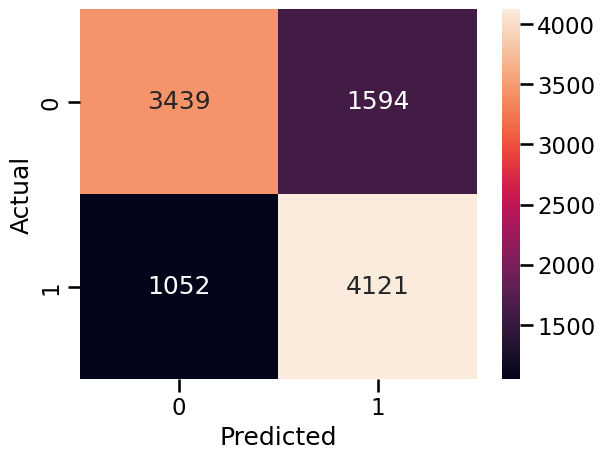

In [103]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under_important)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

Number of False Positives and Negatives increased after removing the low importance features. Therefore, I will retain the original data.

## Best Model Evaluation

In [104]:
metric_comparison = pd.DataFrame({'Name':model_name, 'Precision':precision_results, 'Recall':recall_results})
metric_comparison.sort_values(by='Recall', ascending=False).head()

Name  Precision    Recall
1                   LinearSVC   0.693010  0.850957
3  GradientBoostingClassifier   0.722837  0.796056
2      RandomForestClassifier   0.719474  0.792770
0          LogisticRegression   0.729079  0.766286

Although LinearSVC has the highest Recall, the number of false negatives is high. Therefore, I will take GradientBoosting as the best model instead as it has high Precision and Recall, while its difference is also not high.

In [105]:
lr = GradientBoostingClassifier(random_state=state, learning_rate=0.08)
lr.fit(x_train_under, y_train_under)

GradientBoostingClassifier(learning_rate=0.08, random_state=42)

              precision    recall  f1-score   support

           0       0.77      0.69      0.72      5033
           1       0.72      0.80      0.76      5173

    accuracy                           0.74     10206
   macro avg       0.74      0.74      0.74     10206
weighted avg       0.74      0.74      0.74     10206



Text(0.5, 6.8833333333333275, 'Predicted')

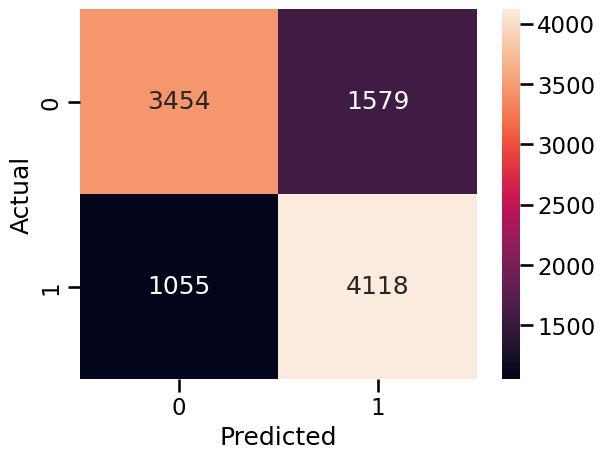

In [106]:
#check model accuracy
from sklearn.metrics import classification_report, confusion_matrix

y_predict = lr.predict(x_test_under)
print(classification_report(y_test_under, y_predict))

cm = confusion_matrix(y_test_under, y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

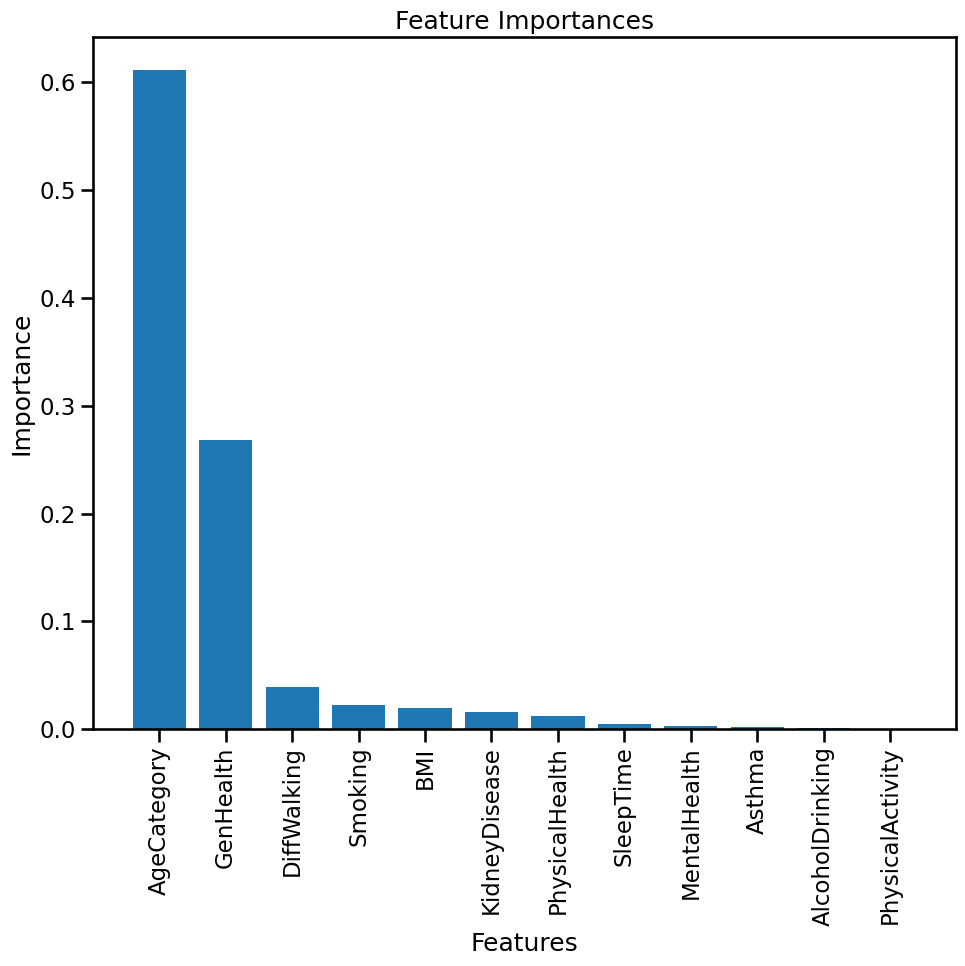

In [107]:
feature_importance_df = pd.DataFrame({'Feature': df_under.columns.tolist()[1:], 'Importance': lr.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 10))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

This model has the lowest False Negatives, meaning that the model is able to accurately identify majority of the patients with Heart Disease. The number of false positives, although not the lowest, is also quite good. Since the goal is to identify most of the patients who actually may have heart disease, the RandomForesstClassifier is the best.

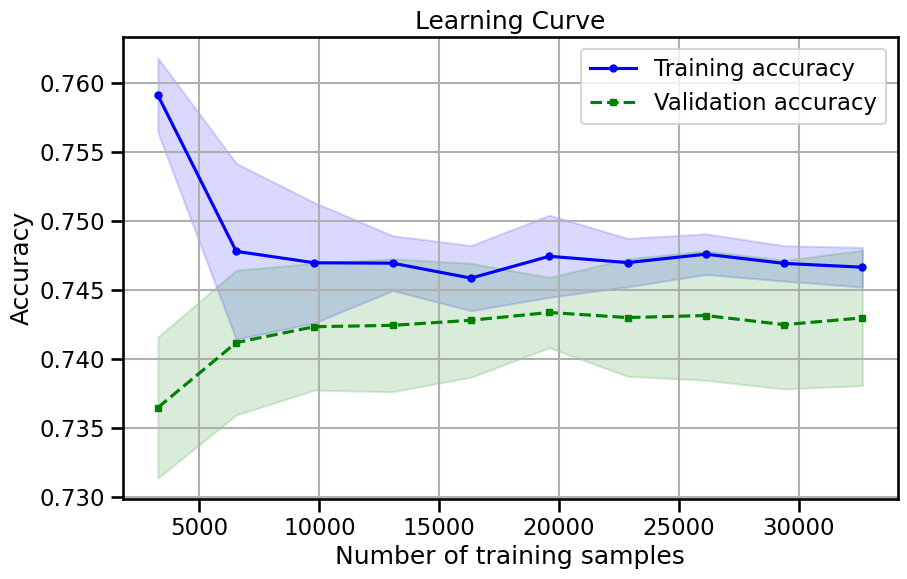

In [108]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss

def plot_learning_curve(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring="accuracy"
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color="blue", marker="o", markersize=5, label="Training accuracy")
    plt.fill_between(
        train_sizes,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color="blue"
    )
    plt.plot(train_sizes, test_mean, color="green", linestyle="--", marker="s", markersize=5, label="Validation accuracy")
    plt.fill_between(
        train_sizes,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color="green"
    )
    plt.xlabel("Number of training samples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid()
    plt.show()

# Use your x_train_under and y_train_under data
train_sizes = np.linspace(0.1, 1.0, 10)  # Adjust the range as needed
plot_learning_curve(lr, x_train_under, y_train_under, train_sizes, cv=5)

In [109]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(lr, x_train_under, y_train_under, cv=5, method="predict_proba", verbose=1, n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   18.2s finished


In [110]:
# Assuming you want to calculate precision-recall and ROC curves
from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(y_train_under, y_scores[:,-1])
fpr, tpr, thresholds = roc_curve(y_train_under, y_scores[:,1])

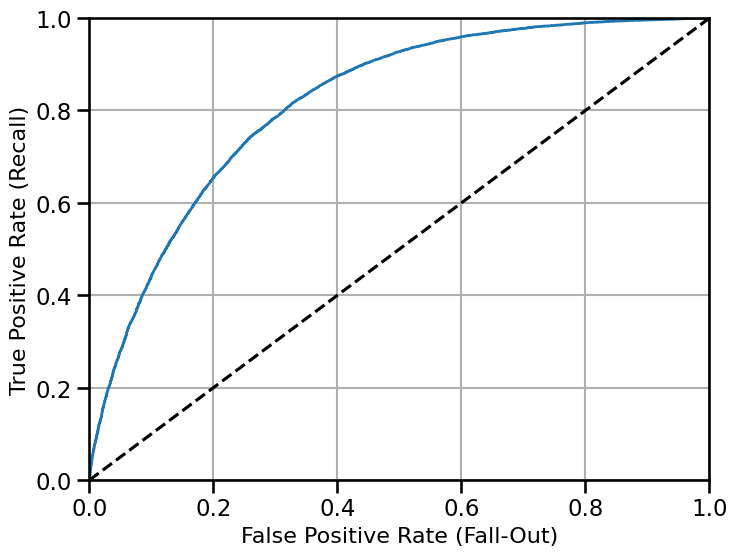

In [111]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                        
plot_roc_curve(fpr, tpr)        
plt.show()

In [112]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_under, y_scores[:,1])

0.8169507015982209

In [113]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_under),
    feature_names=x_train_under.columns,
    class_names=['0', '1'],
    mode='classification'
)

lr.fit(x_train_under, y_train_under)

GradientBoostingClassifier(learning_rate=0.08, random_state=42)

In [114]:
record = 12

exp = explainer.explain_instance(
    data_row=x_test_under.iloc[record],
    # ^ Using the 3rd record in the x_test variable
    predict_fn=lr.predict_proba
)

print("Actual Class:",y_test_under.iloc[record])
exp.show_in_notebook(show_table=True)

# Orange contribute it to be good
# blue contribute it to be bad

C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Actual Class: 1


In [115]:
# Display the prediction probabilities for each class
prediction_probabilities = exp.predict_proba
for class_idx, prob in enumerate(prediction_probabilities):
    print(f"Probability for class {class_idx}: {prob}")

Probability for class 0: 0.1563853045508643
Probability for class 1: 0.8436146954491357


In [116]:
record = 12

exp = explainer.explain_instance(
    data_row=x_test_under.iloc[record],
    predict_fn=lr.predict_proba
)

print("Actual Class:", y_test_under.iloc[record])

# Get the explanation as a text summary
explanation_text = exp.as_list()

for feature, score in explanation_text:
    print(f"Feature: {feature}, Score: {score}")

Actual Class: 1
Feature: AgeCategory > 10.00, Score: 0.27920008694382326
Feature: GenHealth <= 1.00, Score: 0.20209296491150047
Feature: KidneyDisease <= 0.00, Score: -0.10978948312389072
Feature: Smoking <= 0.00, Score: -0.0772947454581109
Feature: DiffWalking > 0.00, Score: 0.06798955807400385
Feature: BMI <= 24.33, Score: -0.05506804942976869
Feature: PhysicalHealth > 5.00, Score: 0.053173975649883444
Feature: AlcoholDrinking <= 0.00, Score: 0.033501031298250786
Feature: Asthma <= 0.00, Score: -0.02712195546281024
Feature: SleepTime <= 6.00, Score: 0.0072780531719266305


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Higher age category contributes along with a GenHealth of 3 and no Kidney Disease made the record not get classified as a patient with HeartDisease and it is correct.

In [117]:
record = 13

exp = explainer.explain_instance(
    data_row=x_test_under.iloc[record],
    # ^ Using the 3rd record in the x_test variable
    predict_fn=lr.predict_proba
)

print("Actual Class:",y_test_under.iloc[record])
exp.show_in_notebook(show_table=True)

# Orange contribute it to be good
# blue contribute it to be bad

Actual Class: 1


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [118]:
record = 13

exp = explainer.explain_instance(
    data_row=x_test_under.iloc[record],
    predict_fn=lr.predict_proba
)

print("Actual Class:", y_test_under.iloc[record])

# Get the explanation as a text summary
explanation_text = exp.as_list()

for feature, score in explanation_text:
    print(f"Feature: {feature}, Score: {score}")

Actual Class: 1
Feature: AgeCategory <= 6.00, Score: -0.3830140741895315
Feature: KidneyDisease <= 0.00, Score: -0.11567391796521781
Feature: 0.00 < Smoking <= 1.00, Score: 0.076157901091205
Feature: DiffWalking <= 0.00, Score: -0.06852517964968441
Feature: 1.00 < GenHealth <= 2.00, Score: 0.03739124147074887
Feature: 27.46 < BMI <= 31.57, Score: 0.03450565423339755
Feature: PhysicalHealth <= 0.00, Score: -0.03222435680445966
Feature: Asthma > 0.00, Score: 0.02980521302657673
Feature: AlcoholDrinking > 0.00, Score: -0.020544945889217993
Feature: 0.00 < MentalHealth <= 3.00, Score: -0.010659210036849318


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


A low GenHealth of 1 and Smoker made the model classify them as HeartDisease, which is correct too.

In [119]:
record = 15

exp = explainer.explain_instance(
    data_row=x_test_under.iloc[record],
    # ^ Using the 3rd record in the x_test variable
    predict_fn=lr.predict_proba
)

print("Actual Class:",y_test_under.iloc[record])
exp.show_in_notebook(show_table=True)

# Orange contribute it to be good
# blue contribute it to be bad

Actual Class: 0


C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [120]:
record = 15

exp = explainer.explain_instance(
    data_row=x_test_under.iloc[record],
    predict_fn=lr.predict_proba
)

print("Actual Class:", y_test_under.iloc[record])

# Get the explanation as a text summary
explanation_text = exp.as_list()

for feature, score in explanation_text:
    print(f"Feature: {feature}, Score: {score}")

C:\Users\fangg\anaconda3_new\envs\mlops\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Actual Class: 0
Feature: AgeCategory <= 6.00, Score: -0.3790525888814785
Feature: KidneyDisease <= 0.00, Score: -0.1388610361136848
Feature: DiffWalking <= 0.00, Score: -0.0709347083164813
Feature: Smoking <= 0.00, Score: -0.06890182593202826
Feature: 1.00 < GenHealth <= 2.00, Score: 0.039895539096299955
Feature: AlcoholDrinking <= 0.00, Score: 0.037706733458836586
Feature: PhysicalHealth <= 0.00, Score: -0.029679422266469295
Feature: Asthma <= 0.00, Score: -0.02475837848397775
Feature: 27.46 < BMI <= 31.57, Score: 0.02290741019682388
Feature: 7.00 < SleepTime <= 8.00, Score: -0.009681766957942225


Due to a high AgeCategory, the model classified the model as patient with HeartDisease.

Let's take a look at the Partial Dependency now

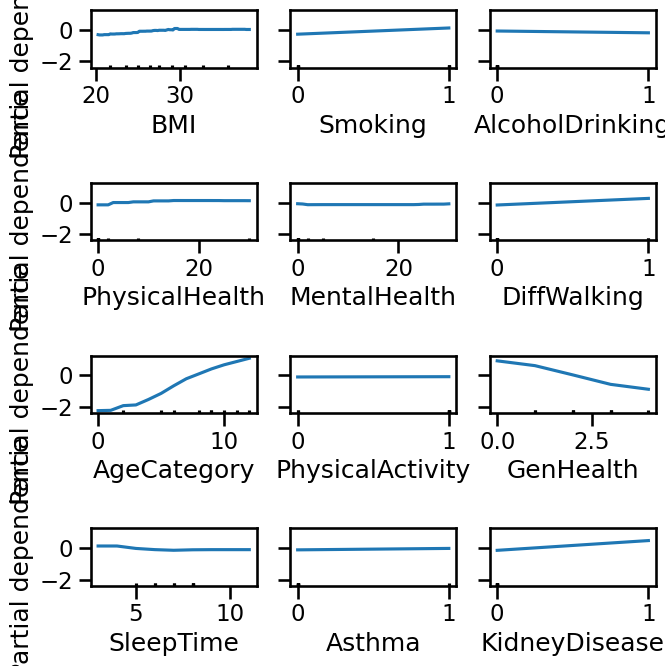

In [121]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = [j for j in range(0, 12, 1)]
display = PartialDependenceDisplay.from_estimator(lr, x_train_under, features, target="bad")

# Modify display options for better separation and aesthetics
display.figure_.set_size_inches(7, 7)  # Adjust figure size

# Display the plot
plt.subplots_adjust(hspace=2)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

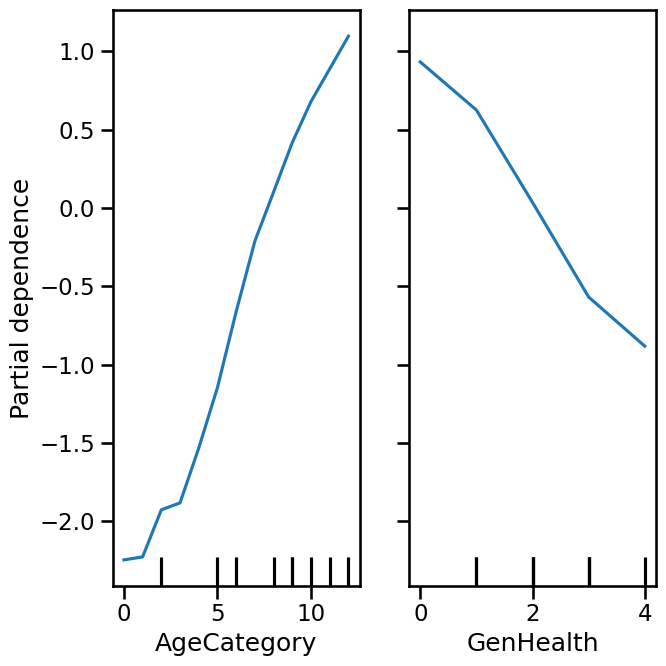

In [122]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = [6, 8]
display = PartialDependenceDisplay.from_estimator(lr, x_train_under, features, target="bad")

# Modify display options for better separation and aesthetics
display.figure_.set_size_inches(7, 7)  # Adjust figure size

# Display the plot
plt.subplots_adjust(hspace=2)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

GenHealth and AgeCategory seems to have a direct link to whether a patient has HeartDisease.

Older patients (Patients with a larger age category number) are more likely to have a prediction score of 1 (indicating HeartDisease). On the other hand, a higher GenHealth (meaning better health) have a reduced chance of HeartDisease.

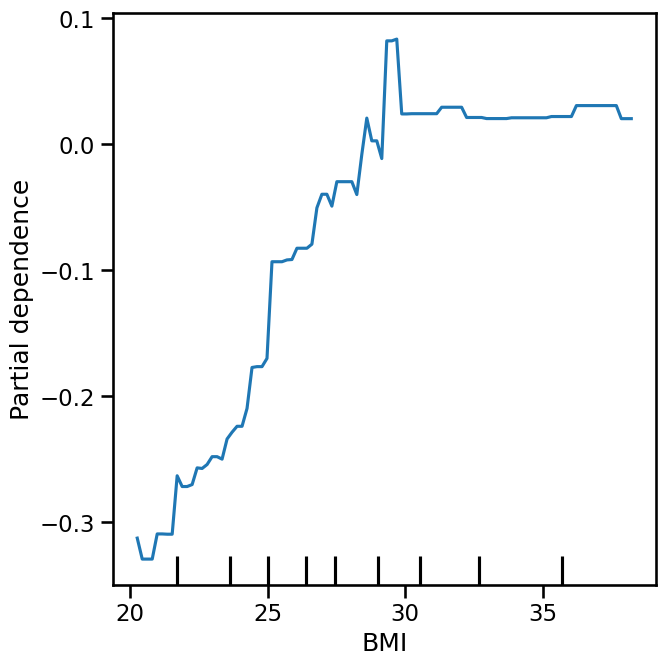

In [123]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = [0]
display = PartialDependenceDisplay.from_estimator(lr, x_train_under, features, target="bad")

# Modify display options for better separation and aesthetics
display.figure_.set_size_inches(7, 7)  # Adjust figure size

# Display the plot
plt.subplots_adjust(hspace=2)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

Looking at high precision because want to ensure the model is finding the right people. Listened to Mr Tay's feedback of evaluating individual model's other metrics like precision. Without that advise, I would have taken Logistic Regression as my best model just because it has the highest AUC_ROC. 